In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
html_page = requests.get('http://www.city-data.com/zipmaps/Denver-Colorado.html') #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [3]:
print(html_page.status_code)

200


<!DOCTYPE html>
<html lang="en">
 <head>
 <meta charset="utf-8"/>
<meta http-equiv="Content-Language" content="en"/>
<meta http-equiv="X-UA-Compatible" content="IE=7, IE=9,IE=edge"/>
<meta name="robots" content="index, follow"/>
<meta name="robots" content="all"/>
<meta name="googlebot" content="all"/>
<meta name="msnbot" msnbot="all"/>
<meta name="apple-mobile-web-app-capable" content="YES"/>
<meta name="viewport" content="width=device-width, initial-scale=1"/>

<!-- Quantcast Tag, part 1 -->
<script type="text/javascript">
  var _qevents = _qevents || [];
  (function() {
  var elem = document.createElement('script');
  elem.src = (document.location.protocol == "https:" ? "https://secure" : "http://edge")
  + ".quantserve.com/quant.js";
  elem.async = true;
  elem.type = "text/javascript";
  var scpt = document.getElementsByTagName('script')[0];
  scpt.parentNode.insertBefore(elem, scpt);
  })();
</script>
<script type='text/javascript'>window.ua={mobile:0};</script>


<style>
#sticky
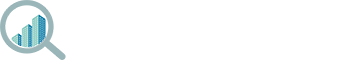
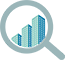
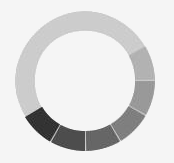

In [4]:
print(html_page.text)


In [17]:
import re

def medianIncomePerYear(year, html):
    for zipStatistics in html.findAll('div', class_="data-block"):

        # <strong>Zip code 80014 statistics:</strong>
        strong = zipStatistics.find('strong').text
        zipCode = int(re.match(r"(Zip code )(\d{5})( statistics:)", strong).groups()[1])

        median_household_income = 0
        for bold_tag in zipStatistics.findAll('b'):
            if f"Estimated median household income in {year}:" in bold_tag.text:
                income_string = bold_tag.nextSibling
                income_string = income_string.strip()
                income_string = re.sub("\$", "", income_string)
                income_string = re.sub(",","", income_string)

                median_household_income = int(income_string)

        yield {"zipCode": zipCode, "medianHouseholdIncome": median_household_income}


medianIncomePerYear2016 = [zipCode for zipCode in medianIncomePerYear(2016, soup)]
(medianIncomePerYear2016)



[{'zipCode': 80012, 'medianHouseholdIncome': 47637},
 {'zipCode': 80014, 'medianHouseholdIncome': 54779},
 {'zipCode': 80110, 'medianHouseholdIncome': 50448},
 {'zipCode': 80111, 'medianHouseholdIncome': 101311},
 {'zipCode': 80123, 'medianHouseholdIncome': 77226},
 {'zipCode': 80202, 'medianHouseholdIncome': 73743},
 {'zipCode': 80203, 'medianHouseholdIncome': 49252},
 {'zipCode': 80204, 'medianHouseholdIncome': 36586},
 {'zipCode': 80205, 'medianHouseholdIncome': 60235},
 {'zipCode': 80206, 'medianHouseholdIncome': 67196},
 {'zipCode': 80207, 'medianHouseholdIncome': 67419},
 {'zipCode': 80209, 'medianHouseholdIncome': 89207},
 {'zipCode': 80210, 'medianHouseholdIncome': 80986},
 {'zipCode': 80211, 'medianHouseholdIncome': 66879},
 {'zipCode': 80212, 'medianHouseholdIncome': 67427},
 {'zipCode': 80214, 'medianHouseholdIncome': 39190},
 {'zipCode': 80216, 'medianHouseholdIncome': 45290},
 {'zipCode': 80218, 'medianHouseholdIncome': 55713},
 {'zipCode': 80219, 'medianHouseholdIncome': 

In [113]:
warning = soup.find('div', class_="zip-codes")
warning

<div class="zip-codes">
 Zip codes: <a href="#80012">80012</a>, <a href="#80014">80014</a>, <a href="#80110">80110</a>, <a href="#80111">80111</a>, <a href="#80123">80123</a>, <a href="#80202">80202</a>, <a href="#80203">80203</a>, <a href="#80204">80204</a>, <a href="#80205">80205</a>, <a href="#80206">80206</a>, <a href="#80207">80207</a>, <a href="#80209">80209</a>, <a href="#80210">80210</a>, <a href="#80211">80211</a>, <a href="#80212">80212</a>, <a href="#80214">80214</a>, <a href="#80216">80216</a>, <a href="#80218">80218</a>, <a href="#80219">80219</a>, <a href="#80220">80220</a>, <a href="#80221">80221</a>, <a href="#80222">80222</a>, <a href="#80223">80223</a>, <a href="#80224">80224</a>, <a href="#80226">80226</a>, <a href="#80227">80227</a>, <a href="#80230">80230</a>, <a href="#80231">80231</a>, <a href="#80232">80232</a>, <a href="#80235">80235</a>, <a href="#80236">80236</a>, <a href="#80237">80237</a>, <a href="#80238">80238</a>, <a href="#80239">80239</a>, <a href="#80

In [114]:
book_container = warning.nextSibling.nextSibling 
book_container.prettify

<bound method Tag.prettify of <div class="zip-statistics">
<div class="zip data-block" id="80012">
<strong>Zip code 80012 statistics:</strong> (<a href="javascript:sm(0);">Find on map</a>)<br/><br/>
<b>Estimated zip code population in 2016:</b> 51,510<br/>
<b>Zip code population in 2010:</b> 46,665<br/>
<b>Zip code population in 2000:</b> 43,447<br/>
<b>Mar. 2016 cost of living index in zip code 80012:</b> 100.2 <b>(near average, U.S. average is 100)</b><br/>
<br/><b>Land area:</b> 7.8 <b>sq. mi.</b><br/>
<b>Water area:</b> 0.0 <b>sq. mi.</b><br/>
<table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Population density:</b> 6,634 <b>people per square mile </b></td><td><div align="left"><table bgcolor="#8f8f8f" border="2" bordercolor="#DDDD00" cellpadding="0" cellspacing="0" width="20"><tr><td> </td></tr></table></div></td> <td> (high).</td></tr></table><br>
<br><div align="left"><table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Males:</b> 25,145 </td><td><img border="

book_container.find( 'div',class_="zip data-block")

In [115]:
titles = book_container.findAll('b')


In [96]:
soup.find( 'div',class_="zip data-block", id="80123")

<div class="zip data-block" id="80123">
<strong>Zip code 80123 statistics:</strong> (<a href="javascript:sm(4);">Find on map</a>)<br><br>
<b>Estimated zip code population in 2016:</b> 46,458<br/>
<b>Zip code population in 2010:</b> 44,795<br/>
<b>Zip code population in 2000:</b> 41,552<br/>
<b>Mar. 2016 cost of living index in zip code 80123:</b> 109.6 <b>(more than average, U.S. average is 100)</b><br/>
<br/><b>Land area:</b> 11.9 <b>sq. mi.</b><br/>
<b>Water area:</b> 1.6 <b>sq. mi.</b><br/>
<table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Population density:</b> 3,910 <b>people per square mile </b></td><td><div align="left"><table bgcolor="#b1b1b1" border="2" bordercolor="#DDDD00" cellpadding="0" cellspacing="0" width="20"><tr><td> </td></tr></table></div></td> <td> (average).</td></tr></table><br>
<br><div align="left"><table border="0" cellpadding="0" cellspacing="0"><tr><td><b>Males:</b> 22,955 </td><td><img border="0" height="10" src="http://pics3.city-data.com/sg.gi

In [7]:
<div class="zip-codes">
 Zip codes: <a href="#80012">80012</a>, <a href="#80014">80014</a>, <a href="#80110">80110</a>, <a href="#80111">80111</a>, <a href="#80123">80123</a>, <a href="#80202">80202</a>, <a href="#80203">80203</a>, <a href="#80204">80204</a>, <a href="#80205">80205</a>, <a href="#80206">80206</a>, <a href="#80207">80207</a>, <a href="#80209">80209</a>, <a href="#80210">80210</a>, <a href="#80211">80211</a>, <a href="#80212">80212</a>, <a href="#80214">80214</a>, <a href="#80216">80216</a>, <a href="#80218">80218</a>, <a href="#80219">80219</a>, <a href="#80220">80220</a>, <a href="#80221">80221</a>, <a href="#80222">80222</a>, <a href="#80223">80223</a>, <a href="#80224">80224</a>, <a href="#80226">80226</a>, <a href="#80227">80227</a>, <a href="#80230">80230</a>, <a href="#80231">80231</a>, <a href="#80232">80232</a>, <a href="#80235">80235</a>, <a href="#80236">80236</a>, <a href="#80237">80237</a>, <a href="#80238">80238</a>, <a href="#80239">80239</a>, <a href="#80246">80246</a>, <a href="#80247">80247</a>, <a href="#80249">80249</a>, <a href="#80264">80264</a>, <a href="#80290">80290</a>, <a href="#80293">80293</a>, <a href="#80294">80294</a>.
	</div>

SyntaxError: invalid syntax (<ipython-input-7-45e6612aec02>, line 1)

In [69]:
info_stuff =soup.find_all("b")
info_stuff

[<b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b class="caret"></b>,
 <b>a detailed profile</b>,
 <b>a detailed profile</b>,
 <b>Business Search</b>,
 <b>14 Million</b>,
 <b>Estimated zip code population in 2016:</b>,
 <b>Zip code population in 2010:</b>,
 <b>Zip code population in 2000:</b>,
 <b>Mar. 2016 cost of living index in zip code 80012:</b>,
 <b>(near average, U.S. average is 100)</b>,
 <b>Land area:</b>,
 <b>sq. mi.</b>,
 <b>Water area:</b>,
 <b>sq. mi.</b>,
 <b>Population density:</b>,
 <b>people per square mile </b>,
 <b>Males:</b>,
 <b>Females:</b>,
 <b>Real estate property taxes paid for housing units in 2016:</b>,
 <b>Median real estate property taxes paid for housing units with mortgages in 2016:</b>,
 <b>Median real estate property taxes paid for housing units with no mortgage in 2016:</b>,
 <b>Estimated median house/condo value in 2016:</b>,
 <b>E

In [72]:
souppp = BeautifulSoup('<b>Estimated median household income in 2016:</b>')
tag = soup.b
type(tag)
# <class 'bs4.element.Tag'>


bs4.element.Tag

In [73]:
tag.name


'b'

In [74]:
tag.name = "blockquote"
tag

<blockquote class="caret"></blockquote>

In [270]:
soup.p


<p><img alt="google custom search" height="24" id="search_o_google" src="http://pics3.city-data.com/assets/common/google_custom_search_smnar.gif" width="65"/> Jump to a detailed profile, search site with google or try <a class="navlink" href="/advanced/search.php"><span class="glyphicon glyphicon-cog"> </span> advanced search</a></p>

In [271]:
soup.a


<a class="navbar-brand" href="/"><div class="logo1" style="height:30px; width: 180px;" title="city-data.com"></div></a>

In [71]:
soup.b

<b class="caret"></b>

In [170]:
<b>Estimated median household income in 2016:</b>

SyntaxError: invalid syntax (<ipython-input-170-8426721d4e2e>, line 1)

In [ ]:
<div itemscope="" itemtype="http://schema.org/JobPosting" type="tuple" id="301017007468" class="row  ">

In [ ]:
api = "1541f75239a37d7ceddae573ea9dd61c98476924"

In [ ]:

url= "https://api.census.gov/data/2017/acs/acs1?get=NAME,group(B01001)&for=us:1"